<center>
<h1>PCP-2020</h1>
<h3>Allan Oliveira Câmara de Morais</h3>
<h4>MBA de Ciências de Dados</h4>
<h4>Universidade de Fortaleza</h4>
</center>

<center>
<h1>Importação</h1>
</center>

In [1]:
import pandas as pd     
import numpy as np 
import time
import os
import re

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [8]:
jair = pd.read_json('jairbolsonaro.json')
lula = pd.read_json('LulaOficial.json')

In [9]:
jair.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,source,truncated,user
0,NaN,NaN,2010-04-01 02:59:50,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,15,False,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",NaN,...,NaN,NaN,NaN,NaN,NaN,30,False,"<a href=""https://about.twitter.com/products/tw...",False,"{'id': 128372940, 'id_str': '128372940', 'name..."
1,NaN,NaN,2019-01-10 11:02:23,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","{'media': [{'id': 1083318121841262592, 'id_str...",31618,False,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",NaN,...,0.0,NaN,NaN,NaN,NaN,1773,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 128372940, 'id_str': '128372940', 'name..."


<center>
<h1>Verificando qual comentario teve mais curtidadas</h1>
</center>

In [10]:
jair_like_max = np.max(jair["favorite_count"])
jair_text_max = jair[jair.favorite_count == jair_like_max].index[0]
print("############ Dados do Jair ############")
print('\n')
print("O tweet com mais curtidas é: \n{}".format(jair["full_text"][jair_text_max]))
print("\n")
print("A quantidade de curtidas é: {} \n".format(jair_like_max))
print('\n')
print("############ Dados do Lula ############")
print('\n')
lula_like_max = np.max(lula["favorite_count"])
lula_text_max = lula[lula.favorite_count == lula_like_max].index[0]
print("O tweet com mais curtidas é: \n{}".format(lula["full_text"][lula_text_max]))
print("\n")
print("A quantidade de curtidas é: {} \n".format(lula_like_max))

############ Dados do Jair ############


O tweet com mais curtidas é: 
Recebemos há pouco ligação do Presidente dos EUA, @realDonaldTrump nos parabenizando por esta eleição histórica! Manifestamos o desejo de aproximar ainda mais estas duas grande nações e avançarmos no caminho da liberdade e da prosperidade!


A quantidade de curtidas é: 209562 



############ Dados do Lula ############


O tweet com mais curtidas é: 
Lula Livre https://t.co/EJRrynjJjE


A quantidade de curtidas é: 352535 



<center>
<h1>Identificando a origem das mensagens</h1>
</center>


In [5]:
grouped = jair.groupby("source")
grouped.sum()

,id,id_str,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,quoted_status_id,quoted_status_id_str
source,,,,,,,,,,,,,,,,,,
"<a href=""http://tvoto.virtualnet.com.br/"" rel=""nofollow"">tvoto</a>",3.741920e+10,3.741920e+10,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",1.871288e+20,1.871288e+20,0.0,1.672451e+18,1.672451e+18,1.104687e+09,1.104687e+09,0.0,0.0,0.0,6.0,37737.0,40115.0,0.0,0.0,0.0,3.958517e+18,3.958517e+18
"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",5.424279e+17,5.424279e+17,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,478.0,462.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",9.017259e+20,9.017259e+20,0.0,2.357434e+20,2.357434e+20,3.580843e+19,3.580843e+19,0.0,0.0,0.0,16.0,4578254.0,32277200.0,0.0,0.0,0.0,1.853153e+19,1.853153e+19
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",5.268288e+21,5.268288e+21,0.0,7.696303e+20,7.696303e+20,7.305731e+19,7.305731e+19,0.0,0.0,0.0,566.0,14602038.0,84802228.0,0.0,0.0,2.0,4.450962e+20,4.450962e+20
"<a href=""http://www.facebook.com/twitter"" rel=""nofollow"">Facebook</a>",9.870057e+18,9.870057e+18,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,281.0,48.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
"<a href=""http://www.hootsuite.com"" rel=""nofollow"">Hootsuite</a>",7.620853e+18,7.620853e+18,0.0,8.756515e+17,8.756515e+17,1.495122e+08,1.495122e+08,0.0,0.0,0.0,0.0,524.0,253.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
"<a href=""http://www.picbadges.com"" rel=""nofollow"">PicBadges</a>",2.253085e+17,2.253085e+17,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",3.192683e+11,3.192683e+11,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1800.0,2521.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00


In [6]:
# Coletando dados do Jair
jair_android = len(jair[jair["source"].str.contains("Twitter for Android")])
jair_iphone = len(jair[jair["source"].str.contains("Twitter for iPhone")])
jair_tweetdeck = len(jair[jair["source"].str.contains("TweetDeck")])
jair_web_client = len(jair[jair["source"].str.contains("Twitter Web Client")])
jair_tvoto = len(jair[jair["source"].str.contains("tvoto")])
jair_ipad = len(jair[jair["source"].str.contains("Twitter for iPad")])
jair_facebook = len(jair[jair["source"].str.contains("Facebook")])
jair_hootsuite = len(jair[jair["source"].str.contains("Hootsuite")])
jair_picbadges = len(jair[jair["source"].str.contains("PicBadges")])
jair_web_app = len(jair[jair["source"].str.contains("Twitter Web App")])

# Coletando dados do Lula
lula_android = len(lula[lula["source"].str.contains("Twitter for Android")])
lula_iphone = len(lula[lula["source"].str.contains("Twitter for iPhone")])
lula_tweetdeck = len(lula[lula["source"].str.contains("TweetDeck")])
lula_web_client = len(lula[lula["source"].str.contains("Twitter Web Client")])
lula_tvoto = len(lula[lula["source"].str.contains("tvoto")])
lula_ipad = len(lula[lula["source"].str.contains("Twitter for iPad")])
lula_facebook = len(lula[lula["source"].str.contains("Facebook")])
lula_hootsuite = len(lula[lula["source"].str.contains("Hootsuite")])
lula_picbadges = len(lula[lula["source"].str.contains("PicBadges")])
lula_web_app = len(lula[lula["source"].str.contains("Twitter Web App")])



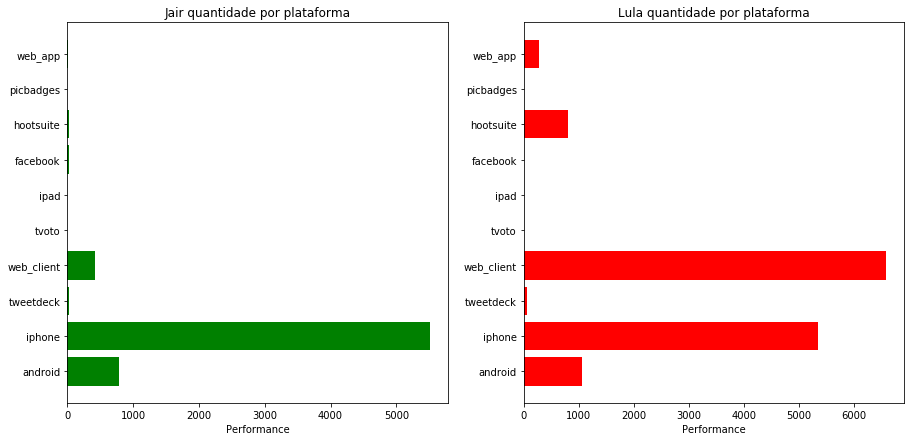

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
nome = ['android', 'iphone', 'tweetdeck','web_client','tvoto','ipad','facebook','hootsuite','picbadges','web_app']
jair_valores = [jair_android,jair_iphone,jair_tweetdeck,jair_web_client,jair_tvoto,jair_ipad,jair_facebook,jair_hootsuite,
           jair_picbadges,jair_web_app]

lula_valores = [lula_android,lula_iphone,lula_tweetdeck,lula_web_client,lula_tvoto,lula_ipad,lula_facebook,lula_hootsuite,
           lula_picbadges,lula_web_app]

ax1.barh(nome,jair_valores,color='g')
ax1.set_title('Jair quantidade por plataforma')
ax1.set_xlabel('Performance')

ax2.barh(nome,lula_valores,color='r')
ax2.set_title('Lula quantidade por plataforma')
ax2.set_xlabel('Performance')

plt.show()

<center>
<h1>Analise de sentimento com TextBlob</h1>
</center>

In [8]:
# http://www.linguateca.pt/Repositorio/ReLi/ReLi-Lex.rar
base_path = 'ReLi-Lex'
train = []
wordsPT = []
wordsPT_sentiments = []

files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

for file in files:
    t = 1 if '_Positivos' in file else -1
    with open(file, 'r', encoding="ISO-8859-1") as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            wordsPT.append((w[1:-1]))
            wordsPT_sentiments.append(t)
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

In [9]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


In [10]:
def sentiment(tweet):
    
    polarity = 0
    
    #blob = TextBlob(tweet, classifier=cl)
    blob = TextBlob(clean_tweet(tweet), classifier=cl) #Clean Tweets
    
    for s in blob.sentences:
        polarity = s.classify() + polarity
    
    if polarity > 0:
        return 1
    elif polarity < 0:
        return -1
    else:
        return 0

In [11]:
jair['SA TextBlob'] = np.array([ sentiment(tweet) for tweet in jair['full_text']])
lula['SA TextBlob'] = np.array([ sentiment(tweet) for tweet in lula['full_text']])


In [347]:
#Jair
jair_pos_tweets = [ tweet for index, tweet in enumerate(jair['full_text']) if jair['SA TextBlob'][index] > 0]
jair_neg_tweets = [ tweet for index, tweet in enumerate(jair['full_text']) if jair['SA TextBlob'][index] < 0]
#Lula
lula_pos_tweets = [ tweet for index, tweet in enumerate(lula['full_text']) if lula['SA TextBlob'][index] > 0]
lula_neg_tweets = [ tweet for index, tweet in enumerate(lula['full_text']) if lula['SA TextBlob'][index] < 0]

In [348]:
print("#################### Jair ####################")
print("Porcentagem de Tweets Positivos: {}%".format(len(jair_pos_tweets)*100/len(jair['full_text'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(jair_neg_tweets)*100/len(jair['full_text'])))
print("\n")
print("#################### Lula ####################")
print("Porcentagem de Tweets Positivos: {}%".format(len(lula_pos_tweets)*100/len(lula['full_text'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(lula_neg_tweets)*100/len(lula['full_text'])))


#################### Jair ####################
Porcentagem de Tweets Positivos: 88.00412128348543%
Porcentagem de Tweets Negativos: 8.1100971445393%


#################### Lula ####################
Porcentagem de Tweets Positivos: 84.25238954615334%
Porcentagem de Tweets Negativos: 13.762449034155471%


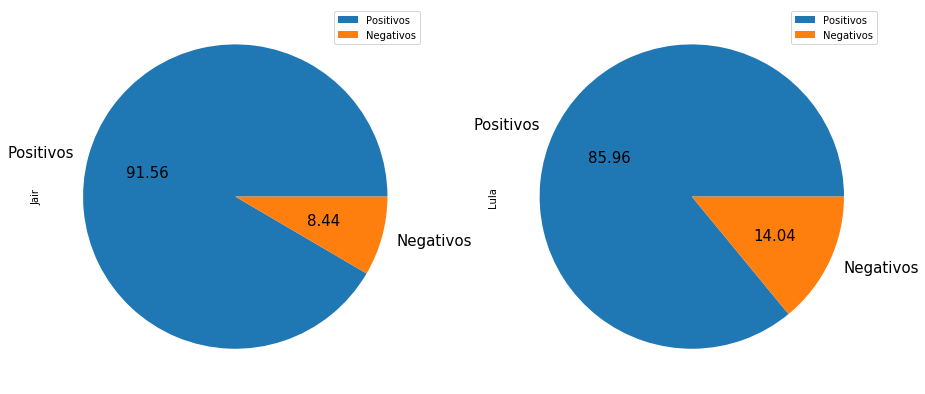

In [349]:
df = pd.DataFrame({'Jair': [len(jair_pos_tweets), len(jair_neg_tweets)],
                   'Lula': [len(lula_pos_tweets), len(lula_neg_tweets)]},
                  index=['Positivos', 'Negativos'])
plot = df.plot.pie(subplots=True,autopct='%.2f',fontsize=15, figsize=(15, 15))

<center>
<h1>WordCloud</h1>
</center>


In [352]:
'''Encontrei no github palavras para aplicar stopwords em portugues, segue endereço https://gist.github.com/alopes/5358189'''

stopwords= set(STOPWORDS)
new_words = []
with open("stopwords.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

In [357]:
jair_words = ' '.join(jair['full_text'])
lula_words = ' '.join(lula['full_text'])

jair_words_clean = " ".join([word for word in jair_words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

lula_words_clean = " ".join([word for word in lula_words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

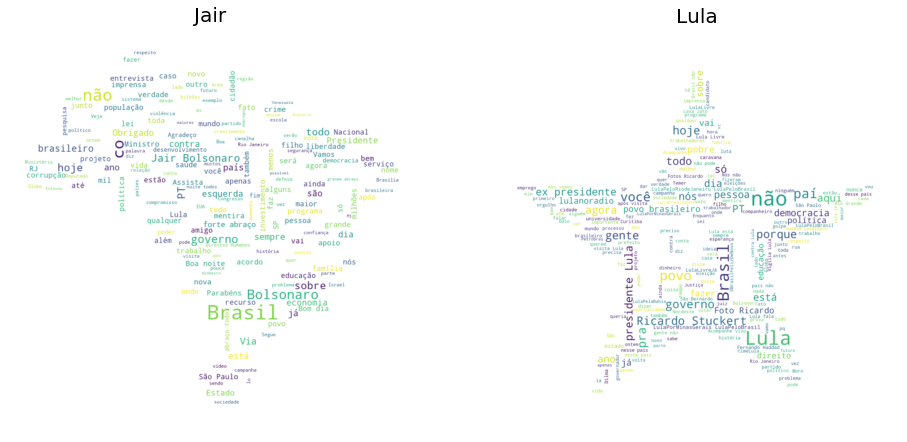

In [385]:
from imageio import imread
import warnings
plt.figure(figsize=(16, 8))
warnings.simplefilter('ignore')

jair_twitter_mask = imread('brasil.jpg')
lula_twitter_mask = imread('lula.jpg')

jair_wc = WordCloud(min_font_size=10, 
               max_font_size=150, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=500, 
               height=400,
               mask=jair_twitter_mask,
               normalize_plurals= True).generate(jair_words_clean)
plt.subplot(121)
plt.imshow(jair_wc, interpolation="bilinear")
plt.axis("off")
plt.title('Jair', size=20)

lula_wc = WordCloud(min_font_size=10, 
               max_font_size=150, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=400, 
               height=400,
               mask=lula_twitter_mask,
               normalize_plurals= True).generate(lula_words_clean)
plt.subplot(122)
plt.imshow(lula_wc, interpolation="bilinear")
plt.axis("off")
plt.title('Lula', size=20)
#plt.savefig('lula-bolsonaro.png', dpi=500)
plt.show()

<center>
<h1>Série Temporal</h1>
    <h2>Tweets por dia</h2>
</center>

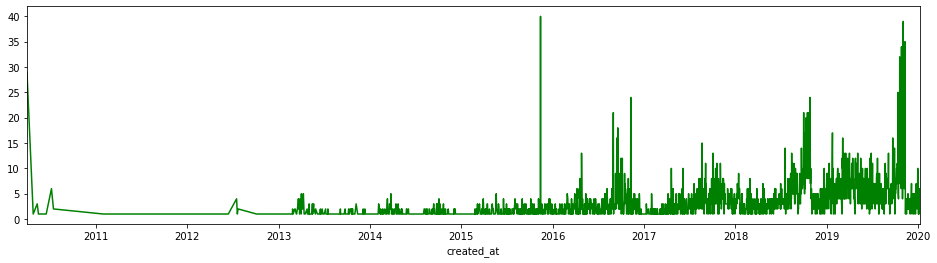

In [134]:
data = jair
data['created_at'] = pd.to_datetime(data['created_at']).apply(lambda x: x.date())
tlen = pd.Series(data['created_at'].value_counts(), index=data['created_at'])
tlen.plot(figsize=(16,4), color='g');

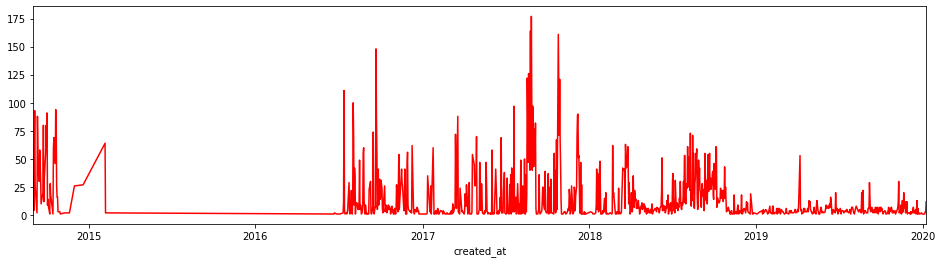

In [379]:
data = lula
data['created_at'] = pd.to_datetime(data['created_at']).apply(lambda x: x.date())
tlen = pd.Series(data['created_at'].value_counts(), index=data['created_at'])
tlen.plot(figsize=(16,4), color='r');